# <center> Bivariate Analysis of dataset </center>

In [9]:
import pandas as pd
import numpy as np;
from scipy.stats import pearsonr
df=pd.read_csv("archive/city_hour.csv").dropna().reset_index().drop("index",axis=1)
df=df[["AQI_Bucket"]]
encD=pd.get_dummies(df,columns=['AQI_Bucket'])
encD.corr()

,AQI_Bucket_Good,AQI_Bucket_Moderate,AQI_Bucket_Poor,AQI_Bucket_Satisfactory,AQI_Bucket_Severe,AQI_Bucket_Very Poor
AQI_Bucket_Good,1.000000,-0.238048,-0.103960,-0.197548,-0.045576,-0.084458
AQI_Bucket_Moderate,-0.238048,1.000000,-0.287591,-0.546489,-0.126078,-0.233641
AQI_Bucket_Poor,-0.103960,-0.287591,1.000000,-0.238662,-0.055061,-0.102035
AQI_Bucket_Satisfactory,-0.197548,-0.546489,-0.238662,1.000000,-0.104629,-0.193891
AQI_Bucket_Severe,-0.045576,-0.126078,-0.055061,-0.104629,1.000000,-0.044732
AQI_Bucket_Very Poor,-0.084458,-0.233641,-0.102035,-0.193891,-0.044732,1.000000


In [2]:
df.shape

(129277, 7)

In [3]:
encD.corr()

,PM2.5,PM10,NO2,SO2,O3,AQI,AQI_Bucket_Good,AQI_Bucket_Moderate,AQI_Bucket_Poor,AQI_Bucket_Satisfactory,AQI_Bucket_Severe,AQI_Bucket_Very Poor
PM2.5,1.000000,0.862602,0.483286,0.219911,0.131282,0.813621,-0.230583,-0.074853,0.199888,-0.357079,0.529746,0.455276
PM10,0.862602,1.000000,0.559930,0.247327,0.139196,0.810531,-0.273371,-0.018639,0.245516,-0.393024,0.468442,0.438878
NO2,0.483286,0.559930,1.000000,0.309098,-0.059074,0.455997,-0.219837,0.081413,0.164067,-0.270762,0.207704,0.232538
SO2,0.219911,0.247327,0.309098,1.000000,0.122902,0.193404,-0.104818,0.055414,0.076956,-0.129485,0.085269,0.090362
O3,0.131282,0.139196,-0.059074,0.122902,1.000000,0.261900,-0.165821,0.134209,0.110374,-0.197611,0.105288,0.075048
AQI,0.813621,0.810531,0.455997,0.193404,0.261900,1.000000,-0.314142,-0.085270,0.367435,-0.476763,0.511598,0.579840
AQI_Bucket_Good,-0.230583,-0.273371,-0.219837,-0.104818,-0.165821,-0.314142,1.000000,-0.238048,-0.103960,-0.197548,-0.045576,-0.084458
AQI_Bucket_Moderate,-0.074853,-0.018639,0.081413,0.055414,0.134209,-0.085270,-0.238048,1.000000,-0.287591,-0.546489,-0.126078,-0.233641
AQI_Bucket_Poor,0.199888,0.245516,0.164067,0.076956,0.110374,0.367435,-0.103960,-0.287591,1.000000,-0.238662,-0.055061,-0.102035
AQI_Bucket_Satisfactory,-0.357079,-0.393024,-0.270762,-0.129485,-0.197611,-0.476763,-0.197548,-0.546489,-0.238662,1.000000,-0.104629,-0.193891


## Simple Linear Regression

Estimated coefficients:
b_0 = 0.1100817841186347 
b_1 = -0.002734473404634446


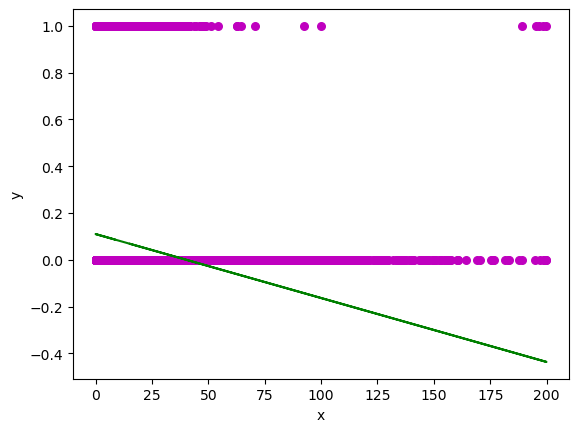

In [4]:
import matplotlib.pyplot as plt
def estimate_coef(x, y):
 n = np.size(x)
 m_x = np.mean(x)
 m_y = np.mean(y)
 SS_xy = np.sum(y*x) - n*m_y*m_x
 SS_xx = np.sum(x*x) - n*m_x*m_x
 b_1 = SS_xy / SS_xx
 b_0 = m_y - b_1*m_x
 return (b_0, b_1)
def plot_regression_line(x, y, b):
 plt.scatter(x, y, color = "m",
 marker = "o", s = 30)
 # predicted response vector
 y_pred = b[0] + b[1]*x
 plt.plot(x, y_pred, color = "g")
 plt.xlabel('x')
 plt.ylabel('y')
 plt.show( )
def main():
 x = encD["SO2"]
 y = encD["AQI_Bucket_Good"]
 b = estimate_coef(x, y)
 print("Estimated coefficients:\nb_0 = {} \nb_1 = {}".format(b[0], b[1]))
 plot_regression_line(x, y, b)
if __name__ == "__main__":
 main( ) 

## Chi Squared test

In [5]:
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(encD["AQI"])
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
 print('Dependent (reject H0)')
else:
 print('Independent (H0 holds true)') 

p value is 1.0
Independent (H0 holds true)


# T-Test

In [6]:
from scipy.stats import ttest_ind
param1 = encD["O3"]
param2 = encD["AQI_Bucket_Good"]
stat, p = ttest_ind(param1, param2)
print("Statistics: %.3f, p = %.3f" % (stat,p)) 

Statistics: 471.017, p = 0.000


## Analysis of Variance

In [7]:
import scipy.stats as stats
fvalue, pvalue = stats.f_oneway(encD["O3"], encD["AQI_Bucket_Good"],encD["AQI_Bucket_Moderate"],encD["AQI_Bucket_Poor"],encD["AQI_Bucket_Satisfactory"],encD["AQI_Bucket_Severe"],encD["AQI_Bucket_Very Poor"] )
print("fvalue: ", fvalue, ", pvalue: ", pvalue) 

fvalue:  220625.20408816423 , pvalue:  0.0


## Scatterplots

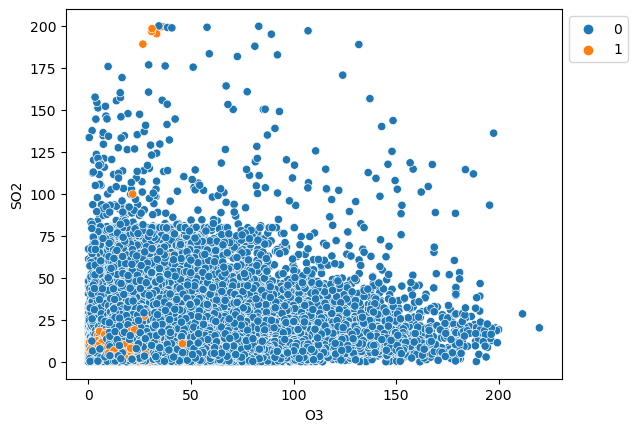

In [8]:
import seaborn as sns
sns.scatterplot(x = "O3", y = "SO2", hue= "AQI_Bucket_Good", data = encD)
plt.legend(bbox_to_anchor = (1,1), loc = 2)
plt.show( ) 